Exercises1:

In [61]:
import scipy.stats as stats
import scipy as sp
from scipy import stats
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [34]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [35]:
tips= sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


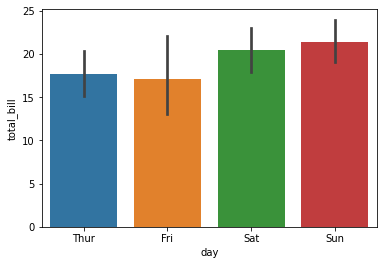

In [36]:
sns.barplot(x="day", y="total_bill", data=tips, ci=99);  #default %95

<AxesSubplot:xlabel='day', ylabel='total_bill'>

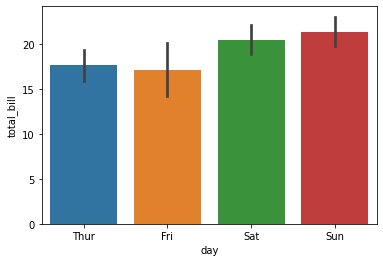

In [37]:
sns.barplot(x="day", y="total_bill", data=tips, ci=90)

In [38]:
tipsFri=tips[tips["day"]== "Fri"]

In [76]:
xbar=tipsFri["total_bill"].mean()

In [40]:
s= tipsFri["total_bill"].std()
s

8.302659723217145

In [41]:
n = tipsFri.shape[0]
n

19

In [64]:
import math

In [65]:
import numpy as np

In [43]:
sem = s/np.sqrt(n)
sem


1.9047607734794163

In [44]:
tipsFri["total_bill"].sem()

1.9047607734794163

In [66]:
from math import sqrt

In [67]:
import scipy as sp

In [82]:
upper = xbar + 1.734*sem
upper

20.454434128581727

In [83]:
lower= xbar  - 1.734*sem
lower

13.848723766155112

In [ ]:
stats.t.ppf(0.95,18)

1.7340636066175354

In [84]:
stats.t.interval(0.90, 18, loc=xbar,scale=sem)

(13.848602610765097, 20.454555283971743)

In [ ]:
stats.t.interval(0.90, 18, loc=tipsFri["total_bill"].mean(), scale=tipsFri["total_bill"].sem())

(13.848602610765097, 20.454555283971743)

Exercises2:

In [50]:
df=pd.read_csv("ceramics.csv")
df

,id,lab,batch,temp,labrunid
0,1,1,1,1555.921536,a 1
1,2,1,2,1513.108758,a 2
2,3,1,1,1534.644568,a 3
3,4,1,2,1532.648024,a 4
4,5,1,1,1535.921379,a 5
...,...,...,...,...,...
475,956,8,2,1517.475271,h956
476,957,8,1,1561.529391,h957
477,958,8,2,1508.440945,h958
478,959,8,1,1544.274788,h959


In [51]:
import pandas as pd

In [52]:
df.head()

,id,lab,batch,temp,labrunid
0,1,1,1,1555.921536,a 1
1,2,1,2,1513.108758,a 2
2,3,1,1,1534.644568,a 3
3,4,1,2,1532.648024,a 4
4,5,1,1,1535.921379,a 5


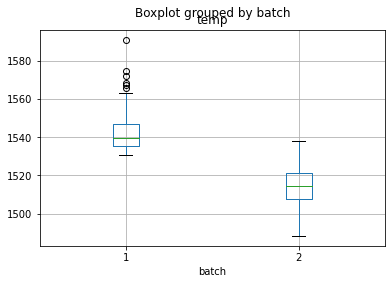

In [62]:
df.boxplot("temp", by="batch");

In [80]:
df[df["batch"]==1]["temp"]

0      1555.921536
2      1534.644568
4      1535.921379
6      1531.971576
8      1535.313594
          ...     
470    1548.542888
472    1549.095133
474    1530.733621
476    1561.529391
478    1544.274788
Name: temp, Length: 240, dtype: float64

In [86]:
indTest =stats.ttest_ind(df[df["batch"]==1]["temp"], df[df["batch"]==2]["temp"], equal_var=False, alternative='two-sided')
indTest

Ttest_indResult(statistic=31.48504665961039, pvalue=1.2559198648025654e-118)

In [87]:
indTest = stats.ttest_ind(df[df["batch"]==1]["temp"], df[df["batch"]==2]["temp"], equal_var=True, alternative='two-sided')
indTest

Ttest_indResult(statistic=31.48504665961039, pvalue=1.2311249084838586e-118)

In [88]:
indTest.statistic

31.48504665961039

In [89]:
indTest.pvalue

1.2311249084838586e-118

In [90]:
alpha= 0.05
if indTest.pvalue < alpha/2:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [75]:
stats.ttest_ind(df[df["batch"]==1]["temp"], df[df["batch"]==2]["temp"], equal_var=False, alternative='greater')

Ttest_indResult(statistic=31.48504665961039, pvalue=6.279599324012827e-119)